In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
# execute if warnings should be ignored:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 2500)


In [2]:

df01 = pd.read_csv("autoscout24.csv")


In [3]:
# 1. --> 46405 sales

df01.shape


(46405, 9)

In [4]:
df01.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
# 1. --> sold cars, carAge between 0 and 10 years
# outliers: mileage,hp,price

df01.describe()


,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [6]:

df01.columns


Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [7]:

df01.isnull().sum()


mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [8]:

df01.nunique()


mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64

In [9]:
# lpg and cng --> forms of natural gas
df01["fuel"].value_counts()


fuel
Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: count, dtype: int64

In [10]:

df01[["make","model"]].value_counts()


make            model                       
Volkswagen      Golf                            1492
Opel            Corsa                           1491
Ford            Fiesta                          1289
Opel            Astra                           1191
Ford            Focus                            985
Volkswagen      up!                              945
Skoda           Fabia                            917
Volkswagen      Polo                             893
smart           forTwo                           725
Skoda           Octavia                          665
Renault         Clio                             658
Fiat            500                              654
SEAT            Ibiza                            650
Renault         Twingo                           646
Volkswagen      Tiguan                           570
SEAT            Leon                             565
Hyundai         i10                              515
Toyota          Aygo                             499
A

In [11]:

# --> find/delete the outliers of the feature "mileage" (delete 2 unrealistic values!):

df01[df01["mileage"] >= 999999]

# delete sample at specific index:
df01.drop(df01[df01["mileage"] > 999990].index, inplace=True)


In [12]:

# --> no outliers at feature "price":
df01[df01["price"] >= 400000]


,mileage,make,model,fuel,gear,offerType,price,hp,year
7383,14090,Lamborghini,Aventador,Gasoline,Automatic,Employee's car,439900,770.0,2021
7384,3600,Lamborghini,Aventador,Gasoline,Automatic,Used,449900,770.0,2021
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019
16429,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530.0,2018
18419,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799.0,2021
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017
29257,350,Mercedes-Benz,SLS,Gasoline,Automatic,Used,465000,591.0,2015


In [13]:

# --> no outliers at feature "hp", but NaN-values
# (NaN-values would have too many different values,
# so filling them with mean values makes no sense!):

# delete sample at specific index:
df01.drop(df01[df01["hp"].isnull()].index, inplace=True)


In [14]:

df01[df01["make"] == "Others"]


,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.0,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.0,2018
9432,50,Others,NaN,Gasoline,Automatic,Used,14990,111.0,2020
12019,1820,Others,NaN,Diesel,NaN,Used,15500,18.0,2011
13030,800,Others,NaN,Others,NaN,Used,2450,1.0,2019
18642,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.0,2021
24366,1,Others,Landwind,Gasoline,Manual,Used,1850,97.0,2012
25810,1000,Others,NaN,Electric,Automatic,Used,3580,5.0,2012
25857,31000,Others,NaN,Gasoline,Manual,Used,3850,79.0,2014
25878,2000,Others,NaN,Others,NaN,Used,10999,1.0,2015


<Axes: >

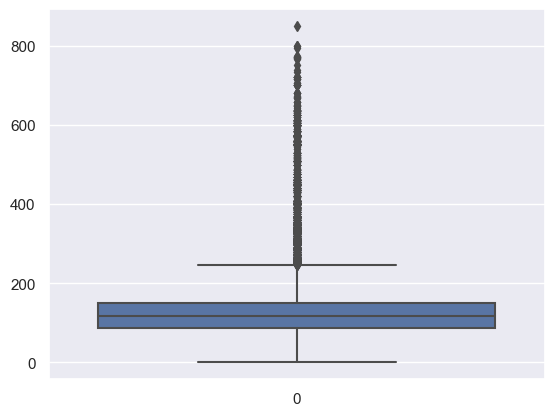

In [15]:

sns.boxplot(df01["hp"])


In [16]:

df01["make"].value_counts


<bound method IndexOpsMixin.value_counts of 0               BMW
1        Volkswagen
2              SEAT
3           Renault
4           Peugeot
            ...    
46400          Fiat
46401          Fiat
46402          Fiat
46403          Fiat
46404          Fiat
Name: make, Length: 46375, dtype: object>

In [17]:

# check NaN-values at feature "model":
df01[df01["model"].isnull()]


,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.0,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.0,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.0,2019
2019,3550,Opel,NaN,Gasoline,Manual,Used,15800,110.0,2019
2496,3000,Audi,NaN,Electric,Automatic,Demonstration,172450,598.0,2021
2557,104574,MINI,NaN,Gasoline,Manual,Used,10490,184.0,2013
2843,25,Baic,NaN,Gasoline,Automatic,Used,20900,136.0,2018
3507,39500,9ff,NaN,Gasoline,Manual,Used,7000,20.0,2018
4310,46597,Volkswagen,NaN,Electric,Automatic,Used,10490,82.0,2015
4620,27785,Lexus,NaN,Electric/Gasoline,Automatic,Used,35990,197.0,2019


In [18]:

# NaN-values at feature "model" are filled with "different"
# so that the data remains usable:
df01["model"] = df01["model"].fillna("different")


In [19]:

# 140 NaN-values --> "different"
df01["model"].value_counts()


model
Golf                            1492
Corsa                           1487
Fiesta                          1287
Astra                           1191
Focus                            985
up!                              945
Fabia                            916
Polo                             893
forTwo                           724
Octavia                          665
500                              664
Clio                             658
Ibiza                            650
Twingo                           645
Leon                             574
Tiguan                           570
i10                              515
Aygo                             499
A4                               488
A3                               482
Passat Variant                   456
Insignia                         429
i30                              401
Megane                           389
Adam                             375
Kuga                             371
Touran                          

In [20]:

# individual models:
make_counts02 = df01[['model']].value_counts()


# convert to Dataframe:
make_counts02 = pd.DataFrame(make_counts02)


make_counts02

,count
model,
Golf,1492
Corsa,1487
Fiesta,1287
Astra,1191
Focus,985
up!,945
Fabia,916
Polo,893
forTwo,724


In [21]:

# individual makes and models:
make_counts01 = df01[['make','model']].value_counts()


# convert to Dataframe:
make_counts01 = pd.DataFrame(make_counts01)


make_counts01


,,count
make,model,
Volkswagen,Golf,1492
Opel,Corsa,1487
Ford,Fiesta,1287
Opel,Astra,1191
Ford,Focus,985
Volkswagen,up!,945
Skoda,Fabia,916
Volkswagen,Polo,893
smart,forTwo,724


In [22]:

# NaN-values at feature "gear" are filled with "Manual"
# because usually they have a gear shift: 
df01.gear.fillna("Manual",inplace=True)


In [23]:

# no more NaN-values existing:
df01["gear"].isnull().sum()


0

In [24]:

df01["gear"].value_counts()


gear
Manual            30542
Automatic         15777
Semi-automatic       56
Name: count, dtype: int64

In [25]:

# "Trailer-Anhänger" deleted:
df01.drop(df01[df01["make"] == "Trailer-Anhänger"].index,inplace=True)


In [26]:

df01.sample(10)


,mileage,make,model,fuel,gear,offerType,price,hp,year
5289,112600,Ford,Mondeo,Diesel,Automatic,Used,9500,163.0,2011
23432,3900,Mitsubishi,Outlander,Electric/Gasoline,Automatic,Demonstration,33300,135.0,2020
22403,15,Nissan,Qashqai,Gasoline,Automatic,Pre-registered,24990,158.0,2021
2688,10,Skoda,Fabia,Gasoline,Automatic,Pre-registered,16688,95.0,2021
8649,155000,Volkswagen,Tiguan,Diesel,Automatic,Used,11490,140.0,2011
23227,500,Nissan,Qashqai,Gasoline,Automatic,Pre-registered,25490,159.0,2021
27842,75421,Volkswagen,Tiguan,Gasoline,Automatic,Used,28477,179.0,2018
8679,130359,MINI,Cooper S Countryman,Gasoline,Manual,Used,10499,184.0,2012
12922,109900,Volkswagen,Golf,Gasoline,Manual,Used,7790,86.0,2013
9523,102000,Hyundai,i30,Gasoline,Manual,Used,7400,99.0,2013


In [27]:

# export file for Tableau,
# before converting the final categorical values to numeric:
df01.to_csv("autoscout24_vis.csv",index=False)



# exporting and  then encoding


In [28]:

# one-dimensional array to list:

liste_make = []

arr01 = np.array(df01["make"])

for i in arr01:
    liste_make.append(i)
        
print(len(liste_make))


46371


In [29]:
liste_model = []

arr02 = np.array(df01["model"])

for i in arr02:
    liste_model.append(i)
        
print(len(liste_model))

46371


In [30]:
liste_fuel = []

arr03 = np.array(df01["fuel"])

for i in arr03:
    liste_fuel.append(i)
        
print(len(liste_fuel))

46371


In [31]:
liste_gear = []

arr04 = np.array(df01["gear"])

for i in arr04:
    liste_gear.append(i)
        
print(len(liste_gear))

46371


In [32]:
liste_offerType = []

arr05 = np.array(df01["offerType"])

for i in arr05:
    liste_offerType.append(i)
        
print(len(liste_offerType))

46371


In [33]:
liste_year = []

arr06 = np.array(df01["year"])

for i in arr06:
    liste_year.append(i)
        
print(len(liste_year))

46371


In [34]:
# converting features: "make", "model","fuel","gear","offerType",
#                      "year"

from sklearn.preprocessing import LabelEncoder

# individual string-features to lists: liste_make, liste_model,
# liste_fuel, liste_gear, liste_offerType, liste_year 

# initialize the encoder:
le = LabelEncoder()

# encode the features to lists-form:
# fit --> create unique values:
# transform --> convert to numeric values:
encoded_make = le.fit_transform(liste_make)
encoded_model = le.fit_transform(liste_model)
encoded_fuel = le.fit_transform(liste_fuel)
encoded_gear = le.fit_transform(liste_gear)
encoded_offerType = le.fit_transform(liste_offerType)
encoded_year = le.fit_transform(liste_year)


In [35]:

# filling the new features with numerical values
# from the respective lists:
df01["encoded_make"] = encoded_make
df01["encoded_model"] = encoded_model
df01["encoded_fuel"] = encoded_fuel
df01["encoded_gear"] = encoded_gear
df01["encoded_offerType"] = encoded_offerType
df01["encoded_year"] = encoded_year


In [36]:
df01

,mileage,make,model,fuel,gear,offerType,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,8,33,2,1,4,0
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,72,396,7,1,4,0
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,63,323,7,1,4,0
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,61,508,7,1,4,0
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,56,32,7,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10


In [37]:
df01.describe()

,mileage,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
count,46371.000000,4.637100e+04,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000,46371.000000
mean,71150.808027,1.657495e+04,133.003494,2016.012529,47.120399,421.950918,5.228677,0.660973,3.663475,5.012529
std,62268.606055,1.930898e+04,75.443174,3.154958,21.620282,256.843797,2.363117,0.475928,0.989698,3.154958
min,0.000000,1.100000e+03,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19833.500000,7.490000e+03,86.000000,2013.000000,29.000000,184.000000,2.000000,0.000000,4.000000,2.000000
50%,60000.000000,1.099900e+04,116.000000,2016.000000,54.000000,402.000000,7.000000,1.000000,4.000000,5.000000
75%,105000.000000,1.949000e+04,150.000000,2019.000000,64.000000,647.000000,7.000000,1.000000,4.000000,8.000000
max,699000.000000,1.199900e+06,850.000000,2021.000000,75.000000,840.000000,10.000000,2.000000,4.000000,10.000000



# visualizations


<Axes: xlabel='year', ylabel='Count'>

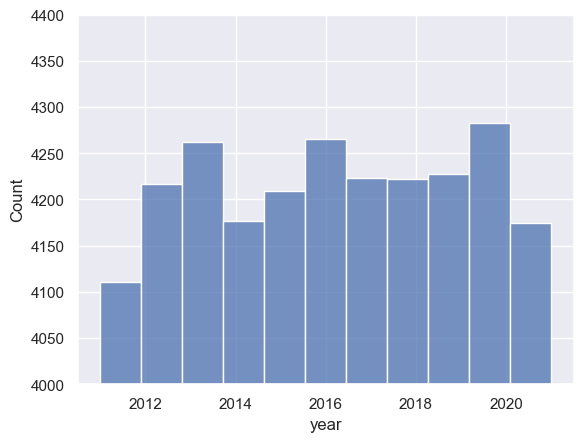

In [38]:
# --> distribution of sales/year of manufacture (carAge):

plt.ylim(4000,4400)
sns.histplot(data=df01,x="year",bins=11)


<Axes: xlabel='price', ylabel='year'>

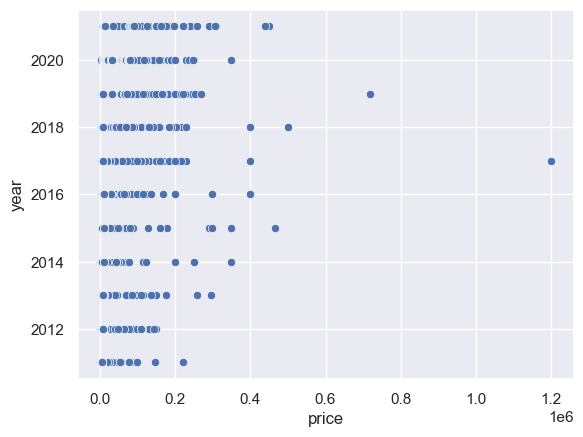

In [38]:

sns.scatterplot(data=df01,y="year",x="price")



# correlations


In [39]:

df01.corr(numeric_only=True)


,mileage,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
mileage,1.000000,-0.304146,-0.015018,-0.679989,-0.018031,-0.063810,-0.385340,0.088982,0.354142,-0.679989
price,-0.304146,1.000000,0.747624,0.405567,-0.121860,0.033451,-0.079765,-0.432103,-0.264439,0.405567
hp,-0.015018,0.747624,1.000000,0.167302,-0.230508,-0.019706,-0.193633,-0.527931,-0.107402,0.167302
year,-0.679989,0.405567,0.167302,1.000000,-0.016238,0.037764,0.067137,-0.235300,-0.465642,1.000000
encoded_make,-0.018031,-0.121860,-0.230508,-0.016238,1.000000,0.299285,0.062220,0.071154,0.007274,-0.016238
encoded_model,-0.063810,0.033451,-0.019706,0.037764,0.299285,1.000000,-0.002275,-0.056982,-0.028380,0.037764
encoded_fuel,-0.385340,-0.079765,-0.193633,0.067137,0.062220,-0.002275,1.000000,0.248413,-0.055395,0.067137
encoded_gear,0.088982,-0.432103,-0.527931,-0.235300,0.071154,-0.056982,0.248413,1.000000,0.124602,-0.235300
encoded_offerType,0.354142,-0.264439,-0.107402,-0.465642,0.007274,-0.028380,-0.055395,0.124602,1.000000,-0.465642
encoded_year,-0.679989,0.405567,0.167302,1.000000,-0.016238,0.037764,0.067137,-0.235300,-0.465642,1.000000


In [40]:
df01.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year', 'encoded_make', 'encoded_model', 'encoded_fuel', 'encoded_gear',
       'encoded_offerType', 'encoded_year'],
      dtype='object')

<Axes: >

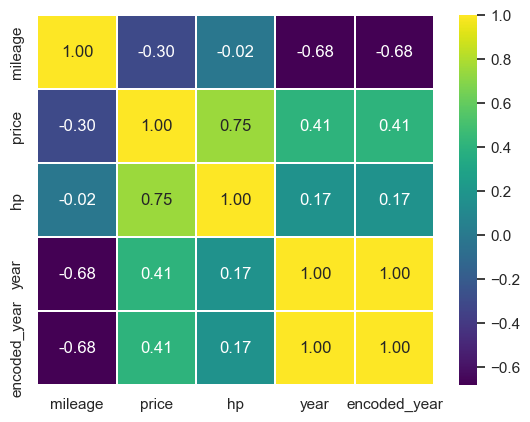

In [41]:
# correlations among the numerical values:
# --> highest correlations 0.7:   year/mileage and hp/price

sns.heatmap(df01.drop(["make","model","fuel","gear","offerType",
                       "encoded_make","encoded_model","encoded_fuel","encoded_gear","encoded_offerType"],
                      axis=1).corr(),cmap="viridis",linewidths=0.1,fmt=".2f",annot=True)


<Axes: >

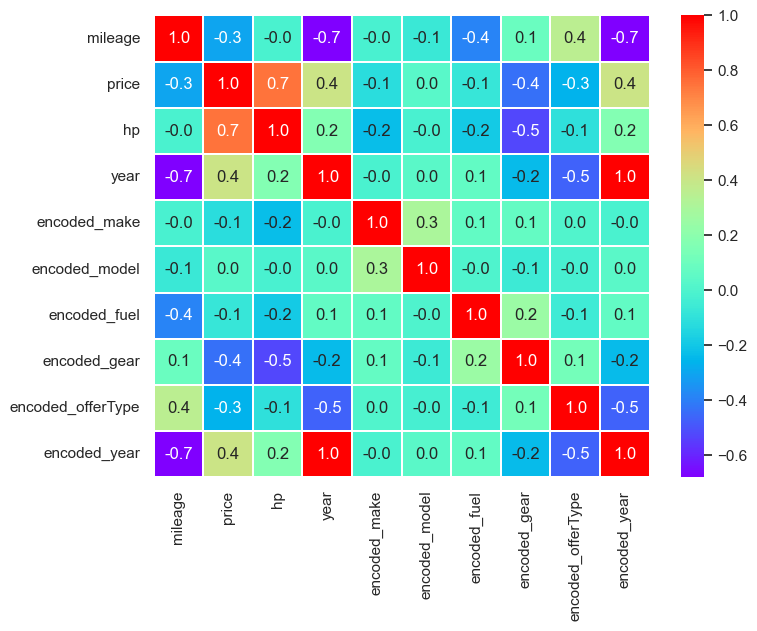

In [42]:

# heaatmap with all correlations:
plt.figure(figsize=(8,6))
sns.heatmap(df01.corr(numeric_only=True),cmap="rainbow",linewidths=0.1,fmt=".1f",annot=True)


In [43]:
# IMPORTANT CORRELATIONS:

# --> positive:
#CORRELATION between 0.7 and 0.8:
#* price  -   hp

#CORRELATION 0.4:
#* price  -   year

#CORRELATION 0.4:
#* offerType  -  mileage

#CORRELATION 0.3:
#* mark   -   model

# --> negative:
#CORRELATION -0.7:
#* mileage  -  year

#CORRELATION -0.5:
#* encoded_gear  -   hp
#* offerType     -   year

#CORRELATION -0.4:
#* encoded_fuel   -   mileage
#* encoded_gear   -   price

#CORRELATION -0.3:
#* offerType   -    price
#* mileage     -    price

In [44]:
df01

,mileage,make,model,fuel,gear,offerType,price,hp,year,encoded_make,encoded_model,encoded_fuel,encoded_gear,encoded_offerType,encoded_year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,8,33,2,1,4,0
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,72,396,7,1,4,0
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,63,323,7,1,4,0
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,61,508,7,1,4,0
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,56,32,7,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,28,54,5,1,3,10


In [45]:

# export the numeric/cleaned data set:
df01.to_csv("autoscout24_numerisch.csv",index=False)
